# Principal Component Analysis

## GOAL: Figure out which handwritten digits are most differentiated with PCA.

Imagine you are working on an image recognition service for a postal service. It would be very useful to be able to read in the digits automatically, even if they are handwritten. (Quick note, this is very much how modern postal services work for a long time now and its actually more accurate than a human). The manager of the postal service wants to know which handwritten numbers are the hardest to tell apart, so he can focus on getting more labeled examples of that data. You will have a dataset of hand written digits (a very famous data set) and you will perform PCA to get better insight into which numbers are easily separable from the rest.



Data
Background:

E. Alpaydin, Fevzi. Alimoglu
Department of Computer Engineering
Bogazici University, 80815 Istanbul Turkey
alpaydin '@' boun.edu.tr
Data Set Information from Original Authors:
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends  𝑥  and  𝑦  tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds.

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to write only inside these boxes. If they make a mistake or are unhappy with their writing, they are instructed to clear the content of a box by using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input devices, but subjects are not aware of this.

SOURCE: https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
digits = pd.read_csv('digits.csv')

In [6]:
digits

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
pixels = digits.drop('number_label',axis=1)

In [8]:
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## Displaying an Image

In [9]:
single_image = pixels.iloc[0]

In [10]:
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [11]:
single_image.to_numpy()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

 Reshape this numpy array into an (8,8) array.

In [12]:
single_image.to_numpy().reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Use Matplotlib or Seaborn to display the array as an image representation of the number drawn. Remember your palette or cmap choice would change the colors, but not the actual pixel values.

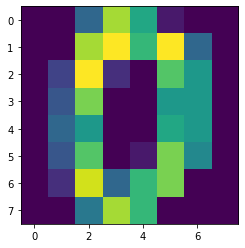

In [13]:
plt.imshow(single_image.to_numpy().reshape(8,8))

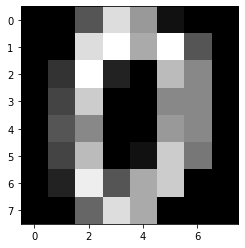

In [14]:
plt.imshow(single_image.to_numpy().reshape(8,8),cmap='gray')

<AxesSubplot:>

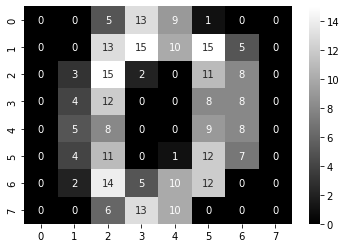

In [15]:
sns.heatmap(single_image.to_numpy().reshape(8,8),annot=True,cmap='gray')

# PCA

## Scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)
scaled_pixels
#scaled_pixels.shape

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca_model = PCA(n_components=2)

In [38]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

How much variance is explained by 2 principal components.

In [39]:
np.sum(pca_model.explained_variance_ratio_)

0.21594970488711412

In [40]:
pca_model.n_components

2

In [41]:
pca_model.components_

array([[-0.00000000e+00, -1.82234675e-01, -2.85869477e-01,
        -2.20369844e-01,  2.51719144e-02,  9.49945215e-03,
         5.24778250e-02,  6.26950942e-02, -3.47058318e-02,
        -2.45533687e-01, -2.29151452e-01,  1.07944949e-01,
        -3.62019127e-02, -3.87100802e-02,  8.37818276e-02,
         9.27744325e-02, -1.66959469e-02, -1.36715317e-01,
         6.30516944e-02,  1.22879184e-01, -1.48194514e-01,
         2.34845363e-02,  1.71199118e-01,  1.04207357e-01,
         3.95189032e-03,  1.16389838e-01,  1.88205012e-01,
        -6.58601832e-02, -1.43532657e-01,  1.28206450e-01,
         1.80619400e-01,  5.27107050e-02, -0.00000000e+00,
         2.38901141e-01,  2.35005764e-01,  5.09175465e-03,
         1.31089977e-02,  1.59115923e-01,  1.29394030e-01,
        -0.00000000e+00,  5.56009636e-02,  1.87156675e-01,
         1.53533848e-01,  4.68262290e-02,  1.10892270e-01,
         1.07209396e-01, -1.79255021e-02,  2.27448137e-03,
         2.88213143e-02, -4.08665170e-02, -1.10270334e-0

In [42]:
df_comp = pd.DataFrame(pca_model.components_, index = ['PC1','PC2'], columns = pixels.columns)

In [43]:
df_comp

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
PC1,-0.000000e+00,-0.182235,-0.285869,-0.220370,0.025172,0.009499,0.052478,0.062695,-0.034706,-0.245534,...,-0.121246,-0.048771,0.001839,-0.160396,-0.279854,-0.194449,-0.017773,-0.103197,-0.119810,-0.071494
PC2,-2.775558e-17,0.047025,0.059563,-0.020803,0.155907,0.274137,0.249735,0.145833,-0.001024,0.027618,...,-0.257751,-0.115001,0.004887,0.044496,0.081398,-0.009903,-0.251933,-0.242617,-0.165089,-0.071330


In this numpy matrix array, each row represents a principal component, Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

<AxesSubplot:>

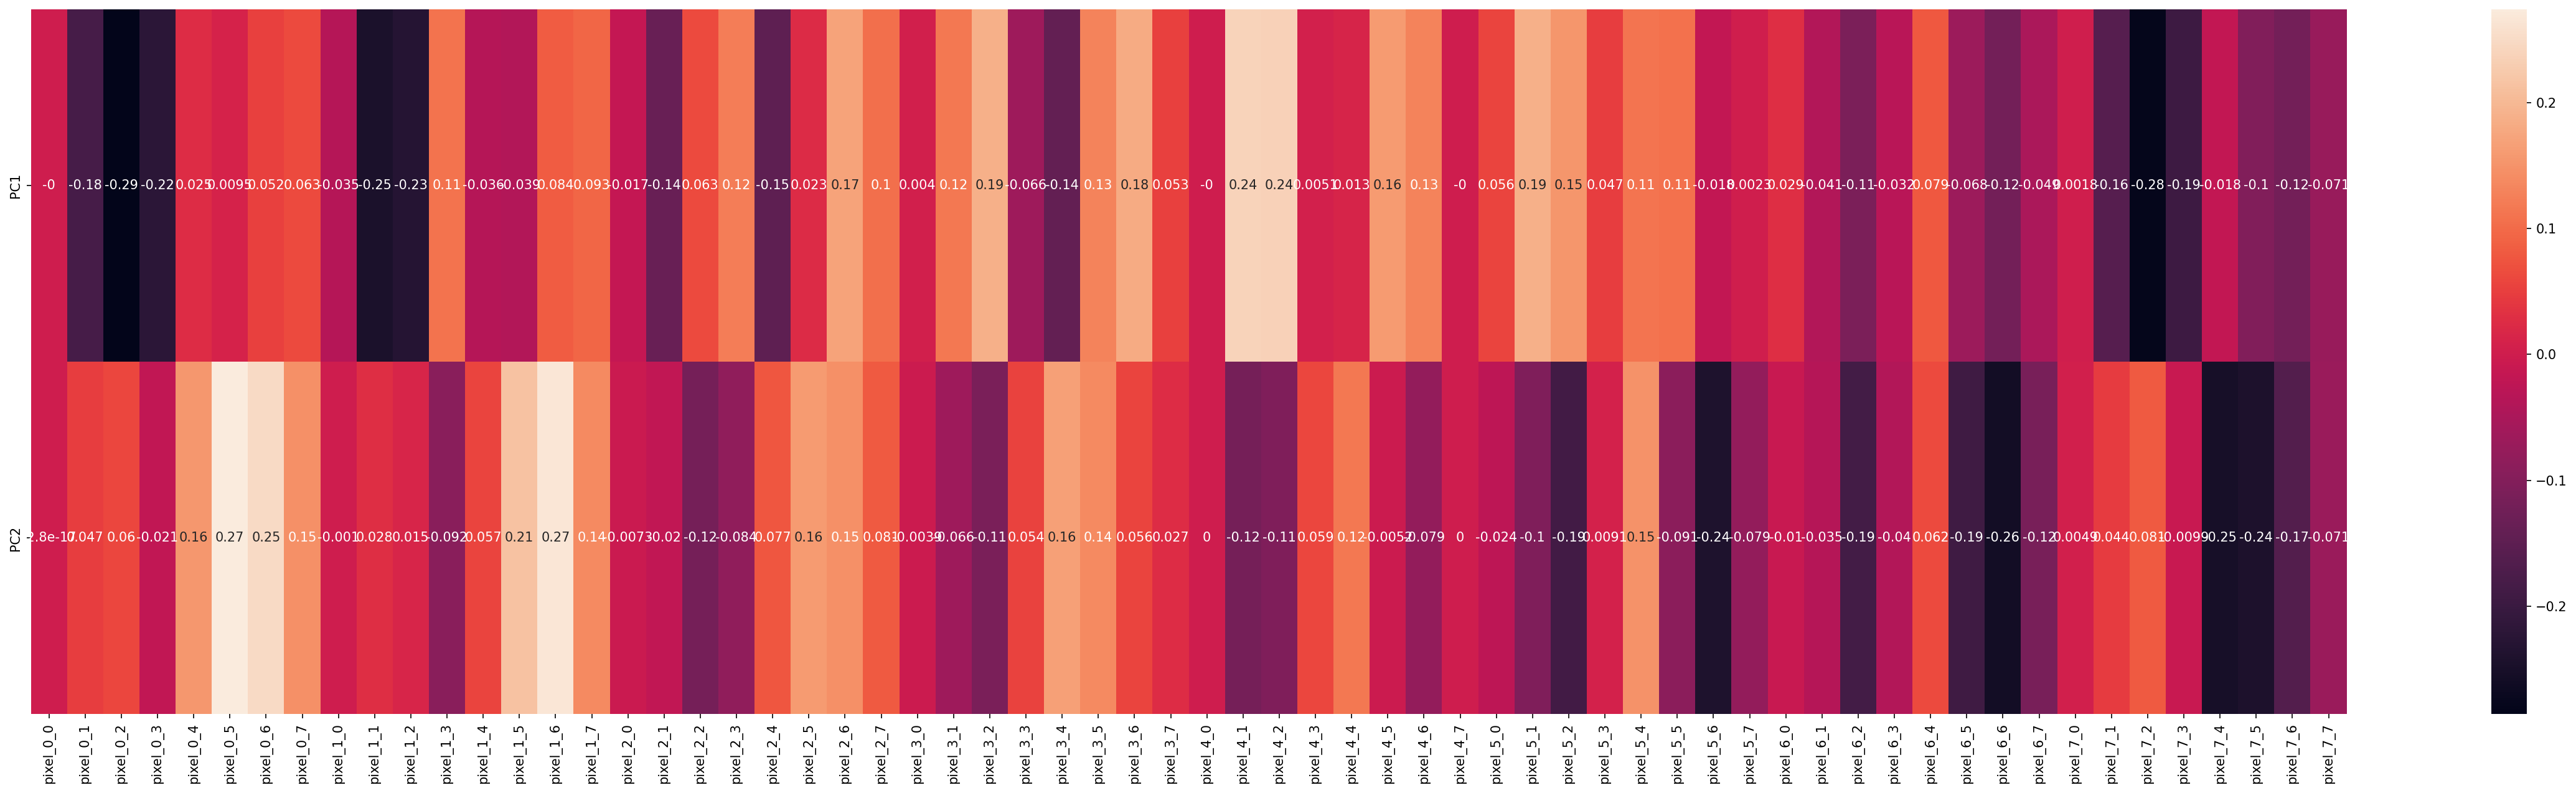

In [44]:
plt.figure(figsize=(40,10), dpi = 150)
sns.heatmap(df_comp, annot = True)

In [45]:
pca_model.explained_variance_ratio_

array([0.12033916, 0.09561054])

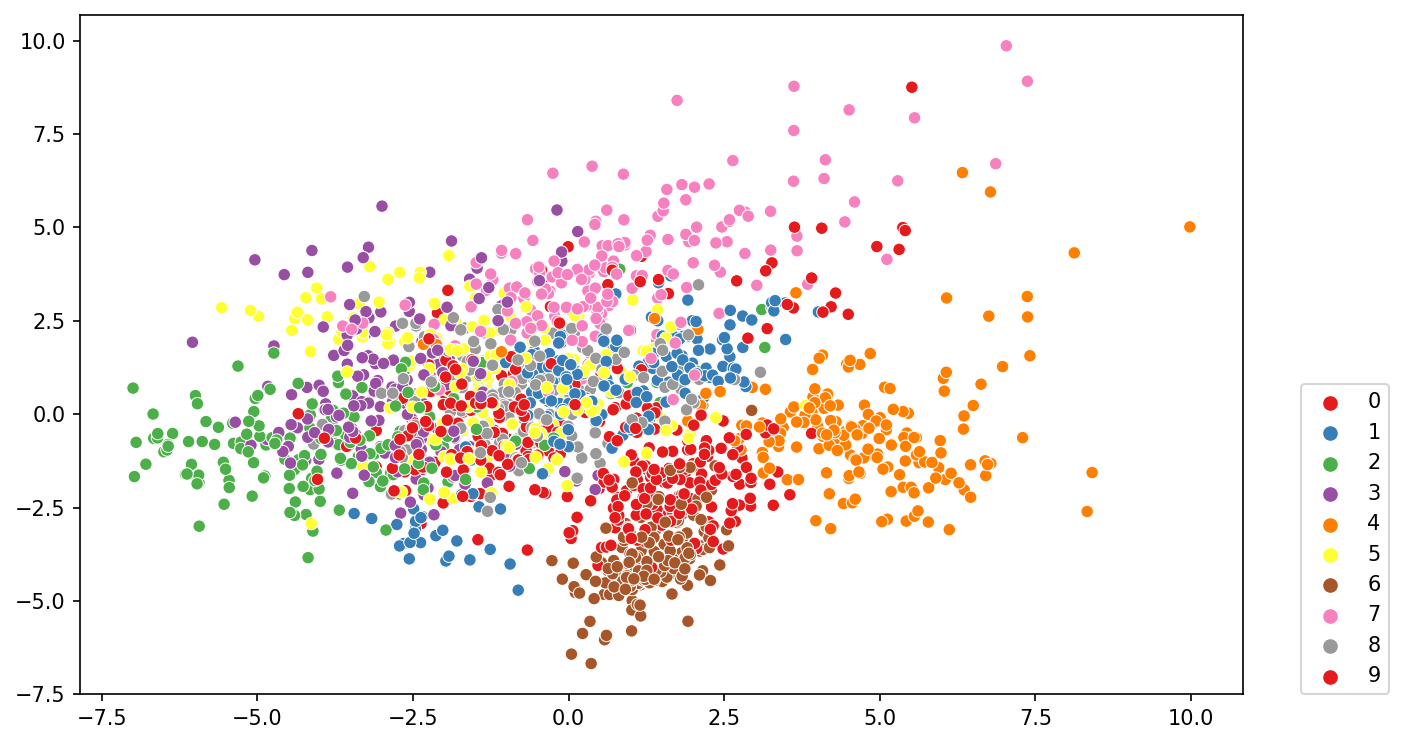

In [66]:
plt.figure(figsize=(10,6),dpi=150)
labels = digits['number_label'].values
sns.scatterplot(pca_pixels[:,0],pca_pixels[:,1],hue=labels,palette='Set1')
plt.legend(loc=(1.05,0))

**RESULTS**

You should see label 4 as being the most separated group, 
implying its the most distinct, similar situation for 2, 6 and 9.

## Choosing proper n_components for PCA

In [48]:
explained_variance = []

for n in range(1,64):
    pca = PCA(n_components = n)
    pca.fit(scaled_pixels)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

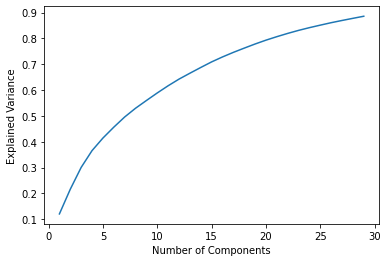

In [54]:
plt.plot(range(1,30),explained_variance[:29])
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');

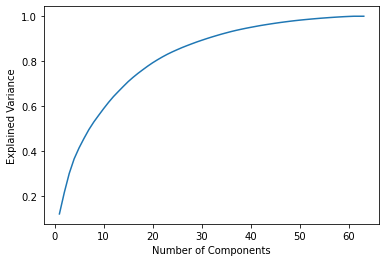

In [55]:
plt.plot(range(1,64),explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');

We can see from the graph that after 30 components there is not much change in explained variance so we can choose 30 as n_components

In [59]:
final_pca = PCA(n_components=30)
final_components =final_pca.fit_transform(scaled_pixels)

In [60]:
final_components

array([[ 1.91421374, -0.95450122, -3.94603566, ...,  0.16682706,
         0.41269307, -0.33467905],
       [ 0.58898042,  0.92463563,  3.92475626, ..., -0.78432791,
        -0.88587669, -0.35232336],
       [ 1.30203963, -0.31718909,  3.02333243, ...,  0.29051103,
        -0.37406921,  1.2426313 ],
       ...,
       [ 1.02259619, -0.14790986,  2.46997088, ..., -0.32935649,
         0.55620179, -0.18769243],
       [ 1.07605518, -0.38090646, -2.4554853 , ...,  0.98712406,
         0.29306278, -0.69796606],
       [-1.25770146, -2.22759186,  0.28362351, ...,  0.93012055,
         0.64751276,  0.32251782]])

In [62]:
final_pca.components_

array([[-0.00000000e+00, -1.82233916e-01, -2.85867998e-01, ...,
        -1.03198002e-01, -1.19810608e-01, -7.14936104e-02],
       [ 0.00000000e+00,  4.70270109e-02,  5.95647925e-02, ...,
        -2.42617772e-01, -1.65089251e-01, -7.13292468e-02],
       [ 1.00613962e-16,  2.35882257e-02, -5.67987582e-02, ...,
        -2.22795282e-02,  1.00365619e-01,  9.24458522e-02],
       ...,
       [-1.18505904e-16, -9.53283937e-02,  6.23805652e-02, ...,
         6.22770349e-02,  1.12155333e-01,  2.86118805e-02],
       [ 1.84788708e-17,  9.71165574e-02, -2.67808647e-01, ...,
        -2.60854047e-01, -1.85783457e-01,  2.19037695e-01],
       [ 3.05199735e-17, -4.39164313e-02,  2.56690145e-02, ...,
        -2.96123822e-02, -5.56216572e-03,  5.57760570e-02]])

In [63]:
final_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914166, 0.01775546, 0.01638068, 0.01596459, 0.01489189,
       0.01347962, 0.01271917, 0.01165772, 0.01057585, 0.00975251,
       0.00944489, 0.00861716, 0.00836151, 0.00797364, 0.00745911])

In [65]:
np.sum(final_pca.explained_variance_ratio_)

0.8931787463341122

We can see that the model is almost 90 % similar to our original data even after reducing into 30 components. Going above 30 components may provide more variance but it makes the model even more complex